In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestAll/'

In [17]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fD2=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia2_T*.nc')[0])

In [5]:
len(np.shape(fP.variables['PRD_NH4']))

4

In [6]:
len(np.shape(fD.variables['BFX_PON']))

3

In [7]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))

In [8]:
checkall(fP)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3RAD', 'RIV_NO3', 'RIV_NH4', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'REFRN'])
Min/Max:
NO3RAD : 0.0 0.0013451242
RIV_NO3 : 0.0 10410.278
RIV_NH4 : 0.0 5788.9
REM_NO3 : 0.0 9.581778
REM_PON : -6.7637277 -0.0
REM_DON : -12.00917 -0.0
PRD_NO3 : -21.759218 -0.0
PRD_NH4 : -5.907855 -0.0
REFRN : -3.967493e-05 1.5560309e-21


In [9]:
checkall(fD)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -2.4161732 2.0754504
ATF_NH4 : -0.56770843 1.7759498
ATF_DON : -0.47563046 0.85519034
ATF_PON : -3.6197355 2.9023535
ATF_LIV : -4.230829 3.2096367
BFX_PON : -0.00018893112 -0.0
BFX_DIAT : -2.2604485e-05 -0.0


In [18]:
checkall(fD2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHS_NO3', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV', 'SMS_NO3', 'SMS_NH4', 'SMS_DON', 'SMS_PON', 'SMS_LIV'])
Min/Max:
PHS_NO3 : -2241959200.0 1712862100.0
PHS_NH4 : -349916260.0 372647070.0
PHS_DON : -207450800.0 304139940.0
PHS_PON : -106324300.0 128954040.0
PHS_LIV : -349035140.0 354426720.0
SMS_NO3 : -21.748274 9.581778
SMS_NH4 : -5.115639 16.001923
SMS_DON : -4.2821913 7.722708
SMS_PON : -6.4425325 11.967412
SMS_LIV : -39.890717 17.814753


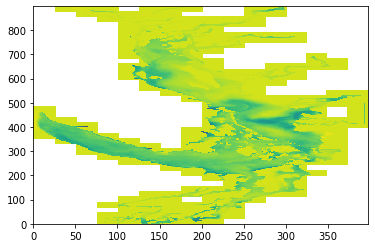

In [12]:
plt.pcolormesh(fD.variables['ATF_NH4'][0,0,:,:])

In [13]:
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*(fD.variables['ATF_NO3'][:,:,:,:]+fD.variables['ATF_NH4']+\
            fD.variables['ATF_PON']+fD.variables['ATF_DON']+fD.variables['ATF_LIV']),3),2),1)

In [14]:
afiltSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NH4'],3),2),1)
afiltSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_PON'],3),2),1)
afiltSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_DON'],3),2),1)
afiltSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_LIV'],3),2),1)

In [47]:
smsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NO3'],3),2),1)
smsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NH4'],3),2),1)
smsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_PON'],3),2),1)
smsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_DON'],3),2),1)
smsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_LIV'],3),2),1)

In [44]:
phsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NO3'],3),2),1)
phsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NH4'],3),2),1)
phsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_PON'],3),2),1)
phsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_DON'],3),2),1)
phsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_LIV'],3),2),1)

In [20]:
smsSumNO3

masked_array(data=[-651509.25, -991791.3125, -1095664.375, -974038.5,
                   -697777.125],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [21]:
smsSumNH4

array([ -28755.99 , -119186.74 , -135285.81 ,  -95196.27 ,   20955.695],
      dtype=float32)

In [22]:
smsSumPON

array([274300.03, 321088.3 , 374846.  , 416956.62, 425624.8 ],
      dtype=float32)

In [23]:
smsSumDON

array([ 89240.414, 133079.6  , 184020.39 , 222727.19 , 234074.89 ],
      dtype=float32)

In [24]:
afiltSumNO3

masked_array(data=[-72447.953125, -110218.71875, -121727.296875,
                   -108173.546875, -77526.484375],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [25]:
afiltSumNH4

array([ -3201.86 , -13241.208, -15029.483, -10568.15 ,   2333.374],
      dtype=float32)

In [26]:
afiltSumPON

array([ -604.2715,  4801.708 ,  9623.818 , 13123.984 , 13034.92  ],
      dtype=float32)

In [27]:
afiltSumDON

array([ 9921.484, 14790.714, 20447.656, 24746.123, 26010.695],
      dtype=float32)

In [28]:
afiltSumLiv

array([32428.445 , 70029.3   , 71481.13  , 44253.863 , -1614.6895],
      dtype=float32)

In [29]:
nitrSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['REM_NO3'][:,:,:,:],3),2),1)

In [30]:
PPNO3Sum=-1*np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PRD_NO3'][:,:,:,:]),3),2),1)
PPNH4Sum=-1*np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PRD_NH4'][:,:,:,:],3),2),1)

In [31]:
REFRNSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['REFRN'][:,:,:,:]),3),2),1)

In [32]:
remSum=-1*np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['REM_DON'][:,:,:,:]+fP.variables['REM_PON'][:,:,:,:]),3),2),1)

In [33]:
rivSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['RIV_NO3'][:,:,:,:]+fP.variables['RIV_NH4'][:,:,:,:]),3),2),1)

In [35]:
fS=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_snp_T_20150501-20150505.nc')

In [41]:
checkall(fS)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'time_centered', 'time_centered_bounds', 'NO3_E3TSNAP', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])
Min/Max:
unknown shape:  time_instant 1
unknown shape:  time_instant_bounds 2
NO3_E3TSNAP : 0.0 962.8308
NH4_E3TSNAP : 0.0 75.641525
PON_E3TSNAP : 0.0 28.147413
DON_E3TSNAP : 0.0 51.221718
LIV_E3TSNAP : 0.0 62.59872


In [36]:
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'time_centered', 'time_centered_bounds', 'NO3_E3TSNAP', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])

In [50]:
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nh4Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NH4_E3TSNAP'][:,:,:,:],3),2),1)
ponSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['PON_E3TSNAP'][:,:,:,:],3),2),1)
donSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['DON_E3TSNAP'][:,:,:,:],3),2),1)
livSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['LIV_E3TSNAP'][:,:,:,:],3),2),1)

In [54]:
no3Sum

masked_array(data=[32694817804470.977, 32619731220009.46,
                   32517570404128.055, 32435476818482.812,
                   32366801931905.098],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [53]:
livSum

masked_array(data=[930728473285.1919, 964867020912.1254,
                   1017317723672.7539, 1061452562295.1859,
                   1064934235003.8654],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [51]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
nh4diff=(nh4Sum[1:]-nh4Sum[:-1])/(24*3600)
pondiff=(ponSum[1:]-ponSum[:-1])/(24*3600)
dondiff=(donSum[1:]-donSum[:-1])/(24*3600)
livdiff=(livSum[1:]-livSum[:-1])/(24*3600)

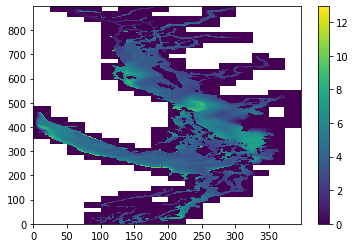

In [49]:
plt.pcolormesh(fS.variables['LIV_E3TSNAP'][0,0,:,:])
plt.colorbar()

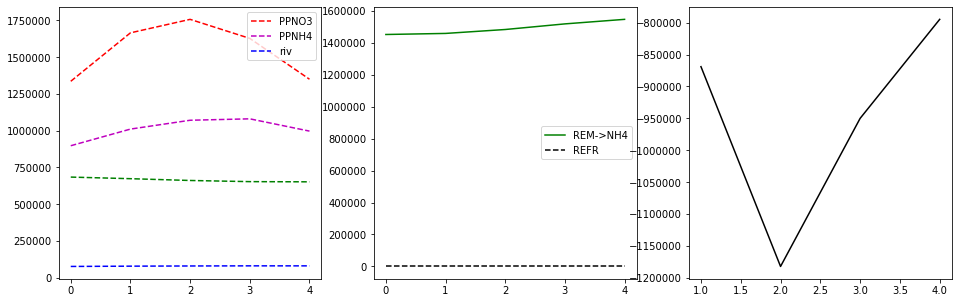

In [58]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
#ax[0].plot(range(0,5),afiltSum,'k-',label='afilt')
ax[0].plot(range(0,5),PPNO3Sum,'r--',label='PPNO3')
ax[0].plot(range(0,5),PPNH4Sum,'m--',label='PPNH4')
ax[0].plot(range(0,5),rivSum,'b--',label='riv')
ax[0].legend()
ax[1].plot(range(0,5),remSum,'g-',label='REM->NH4')
ax[1].plot(range(0,5),REFRNSum,'k--',label='REFR')
ax[0].plot(range(0,5),nitrSum,'g--',label='nitr')
#ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
#ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
#ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(1,5),no3diff,'k-',label='NO3 diff')
ax[2].plot(range(0,5),phsSumNO3+smsSumNO3,'r--',label='NO3 sms+phys')
#ax[2].plot(range(1,5),livdiff,'k-',label='liv diff')
#ax[2].plot(range(0,5),phsSumLiv+smsSumLiv,'r--',label='liv sms+phys')
#ax[2].legend()

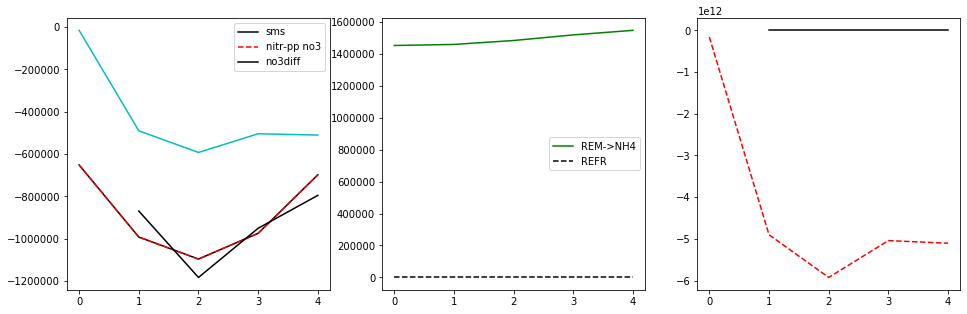

In [71]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(0,5),smsSumNO3,'k-',label='sms')
ax[0].plot(range(0,5),nitrSum-PPNO3Sum,'r--',label='nitr-pp no3')
ax[0].plot(range(1,5),no3diff,'k-',label='no3diff')
ax[0].plot(range(0,5),phsSumNO3/1e7,'c-')
ax[0].legend()
ax[1].plot(range(0,5),remSum,'g-',label='REM->NH4')
ax[1].plot(range(0,5),REFRNSum,'k--',label='REFR')
#ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
#ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
#ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(1,5),no3diff,'k-',label='NO3 diff')
ax[2].plot(range(0,5),phsSumNO3+smsSumNO3,'r--',label='NO3 sms+phys')
#ax[2].plot(range(1,5),livdiff,'k-',label='liv diff')
#ax[2].plot(range(0,5),phsSumLiv+smsSumLiv,'r--',label='liv sms+phys')
#ax[2].legend()

(-800000, 100000)

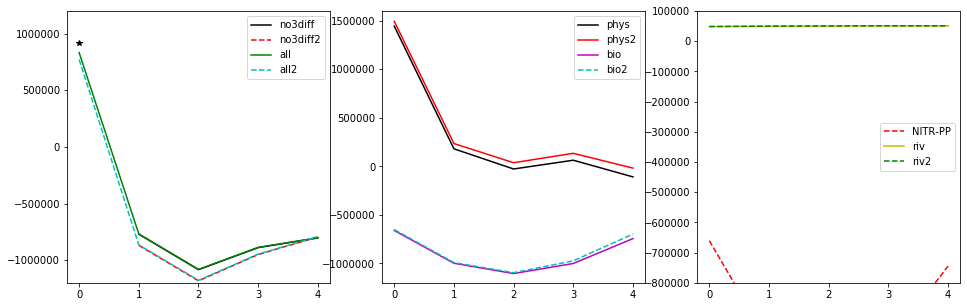

In [21]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='no3diff')
ax[0].plot(range(1,5),no3diff2,'r--',label='no3diff2')
ax[0].plot(range(0,5),allSum,'g-',label='all')
ax[0].plot(range(0,5),allSum2,'c--',label='all2')
ax[0].plot(0,allSum[0]*1.1,'k*')
ax[0].legend()
ax[0].set_ylim(-1200000,1200000)
ax[1].plot(range(0,5),physSum,'k-',label='phys')
ax[1].plot(range(0,5),physSum2,'r-',label='phys2')
ax[1].plot(range(0,5),nitrSum-PPSum,'m-',label='bio')
ax[1].plot(range(0,5),nitrSum2-PPSum2,'c--',label='bio2')
#ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
#ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
#ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[1].set_ylim(-1200000,1600000)
ax[2].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[2].plot(range(0,5),rivSum,'y-',label='riv')
ax[2].plot(range(0,5),rivSum2,'g--',label='riv2')
ax[2].legend()
ax[2].set_ylim(-800000,100000)

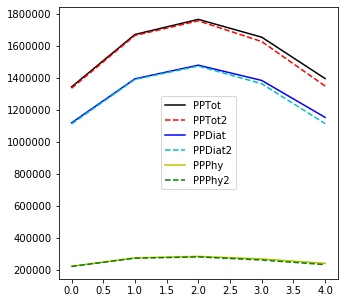

In [22]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(range(0,5),PPSum,'k-',label='PPTot')
ax.plot(range(0,5),PPSum2,'r--',label='PPTot2')
ax.plot(range(0,5),PPDSum,'b-',label='PPDiat')
ax.plot(range(0,5),PPDSum2,'c--',label='PPDiat2')
ax.plot(range(0,5),PPPSum,'y-',label='PPPhy')
ax.plot(range(0,5),PPPSum2,'g--',label='PPPhy2')
ax.legend()

In [17]:
(nitrSum2-PPSum2)/(nitrSum-PPSum)

masked_array(data=[0.9863080978393555, 0.9930127859115601,
                   0.9917044043540955, 0.9729965329170227,
                   0.9369871616363525],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [34]:
rosVA

masked_array(data=[-147311.12,  357502.44,  407511.38,  228382.62,
                    211059.72],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [36]:
sutVA

masked_array(data=[-147311.12,  357502.44,  407511.38,  228382.62,
                    211059.72],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [32]:
disVA

masked_array(data=[-147311.12,  357502.44,  407511.38,  228382.62,
                    211059.72],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [38]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    malUA=np.sum(np.sum(f.variables['ATX_NO3'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['DTX_NO3'][:,:,:,0],2),1)

KeyError: 'NO3TVDY'

In [24]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    harVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [25]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    sjcVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [26]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    rosVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [39]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    sutVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

masked_array(data=[ 147311.12, -357502.44, -407511.38, -228382.62,
                   -211059.72],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [28]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    disVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

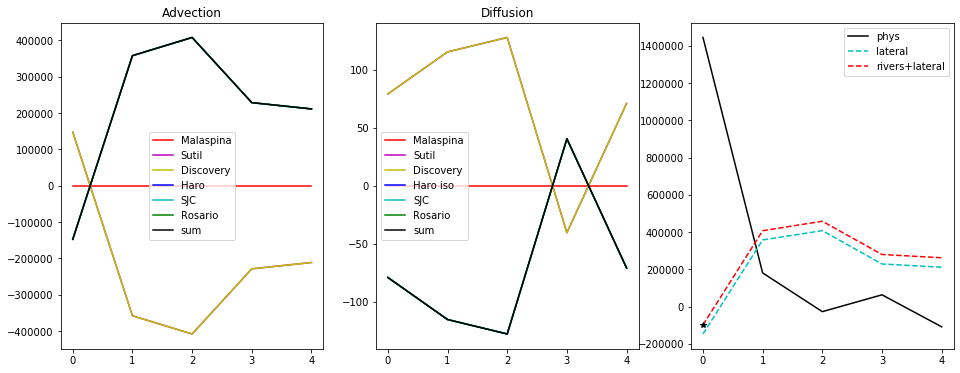

In [29]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),physSum,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSum,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSum[0],'k*')
#ax[2].plot(np.arange(0.5,4,1),no3diff,'k--',label='no3diff')
ax[2].legend()

In [24]:
adv[0],dif[0],rivSum[0],adv[0]+dif[0],adv[0]+dif[0]+rivSum[0],physSum[0]

(1445605.0, 472.66205, 48516.0, 1446077.6, 1494593.6, 1444567.0)

In [25]:
## phys difference
adv+dif+rivSum-physSum

masked_array(data=[50026.625, 49401.46875, 50616.9140625, 50943.5390625,
                   50544.5625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [26]:
#old file, day 1:
f0=nc.Dataset('/results/SalishSea/nowcast-green.201812/01may15/SalishSea_1d_20150501_20150501_ptrc_T.nc')
# old file, day 5:
f4=nc.Dataset('/results/SalishSea/nowcast-green.201812/05may15/SalishSea_1d_20150505_20150505_ptrc_T.nc')
# new file:
f=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_ptrc_T_20150501-20150505.nc')

Text(0.5, 1.0, 'leap-euler\n bSi')

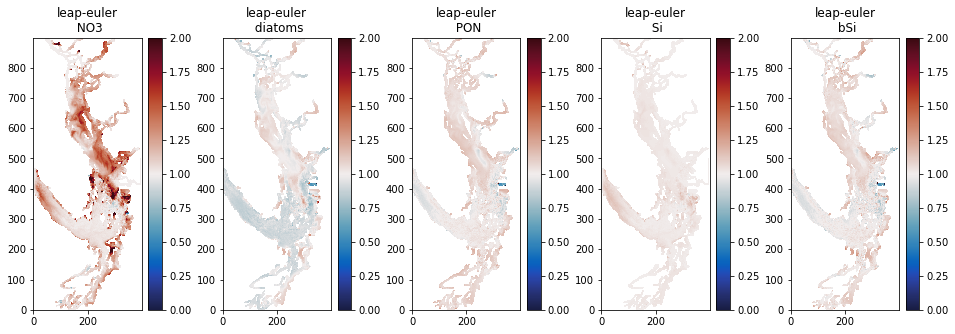

In [27]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
iax=ax[0]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['NO3'][4,0,:,:]/f4.variables['nitrate'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n NO3')

iax=ax[1]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['DIAT'][4,0,:,:]/f4.variables['diatoms'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n diatoms')

iax=ax[2]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['PON'][4,0,:,:]/f4.variables['particulate_organic_nitrogen'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n PON')

iax=ax[3]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['Si'][4,0,:,:]/f4.variables['silicon'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n Si')

iax=ax[4]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['bSi'][4,0,:,:]/f4.variables['biogenic_silicon'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n bSi')

Input sinking rate: 0.5 -- 1.2 m/d
26.424690182966632 22.4079551578574 37.88041407109447 57.32964524047881
Diagnosed sinking rate:  5.690830462306783 m/d


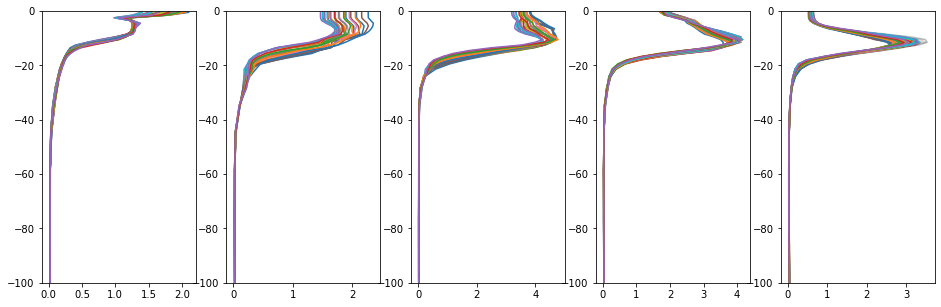

In [28]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
for jj in range(455,460): #range(450,475):
    for ii in range(265,270): #range(260,275):
        ax[0].plot(f0.variables['diatoms'][0,:,jj,ii],-1*f0.variables['deptht'][:],'k-',alpha=.1)
        ax[4].plot(f4.variables['diatoms'][0,:,jj,ii],-1*f0.variables['deptht'][:],'k-',alpha=.1)
for jj in range(455,460): #range(450,475):
    for ii in range(265,270): #range(260,275):
        ax[0].plot(f.variables['DIAT'][0,:,jj,ii],-1*f.variables['deptht'][:])
        ax[1].plot(f.variables['DIAT'][1,:,jj,ii],-1*f.variables['deptht'][:])
        ax[2].plot(f.variables['DIAT'][2,:,jj,ii],-1*f.variables['deptht'][:])
        ax[3].plot(f.variables['DIAT'][3,:,jj,ii],-1*f.variables['deptht'][:])
        ax[4].plot(f.variables['DIAT'][4,:,jj,ii],-1*f.variables['deptht'][:])
for iax in ax:
    iax.set_ylim(-100,0)
print('Input sinking rate: 0.5 -- 1.2 m/d')
z0=np.mean(np.mean(np.nansum(f.variables['DIAT'][0,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][0,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z1=np.mean(np.mean(np.nansum(f.variables['DIAT'][1,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][1,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z2=np.mean(np.mean(np.nansum(f.variables['DIAT'][2,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][2,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z3=np.mean(np.mean(np.nansum(f.variables['DIAT'][3,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][3,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z4=np.mean(np.mean(np.nansum(f.variables['DIAT'][4,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][4,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
print(z1,z2,z3,z4)
print('Diagnosed sinking rate: ',(z4-z0)/4,'m/d')